**1. Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading & Understanding**

In [ ]:
# read the csv data to a pandas dataframe
df = pd.read_csv("/content/train.csv")

Initial Inspection

In [ ]:
df.shape

(800, 22)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,Asian,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,White-European,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,White-European,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,White-European,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# convert age column datatype to integer
df["age"] = df["age"].fillna(df["age"].mean())

In [ ]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,Asian,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,White-European,no,no,India,no,2.255185,18 and more,Self,0


In [ ]:
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['Asian' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Turkish' 'South Asian' 'Latino' '?' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
# dropping ID & age_desc column
df.drop(columns=["ID", "age_desc"], errors='ignore', inplace=True)

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Asian,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,White-European,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [ ]:
# taget class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights:**
1. missing values in ethnicity & relation
2. age_desc column has only 1 unique value. so it is removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target column

**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Asian,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,White-European,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result

In [ ]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 28.452117626575
Median: 24.848350449999998


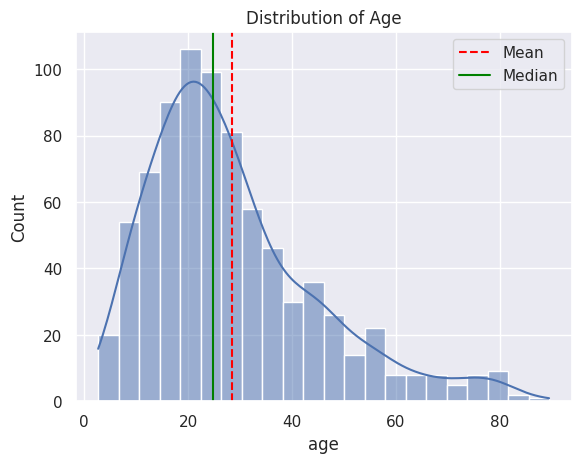

In [ ]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


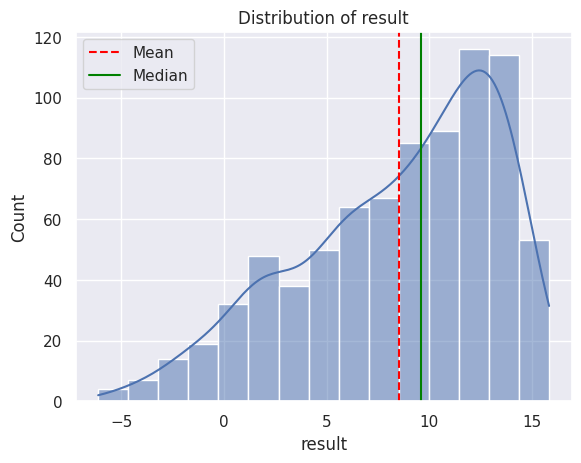

In [ ]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

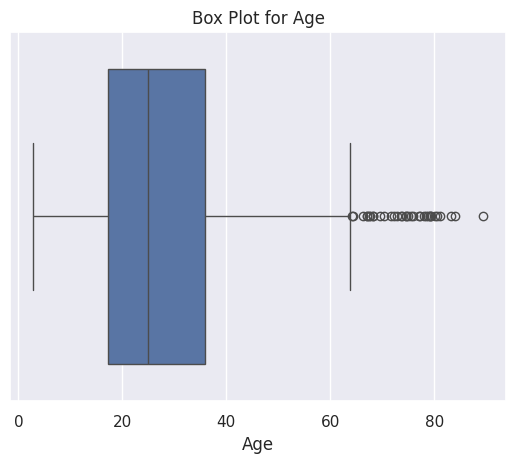

In [ ]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

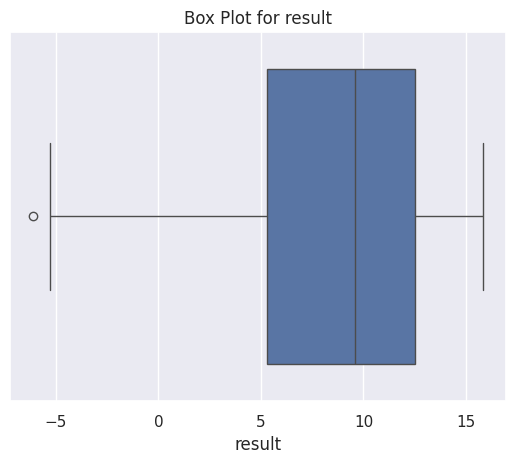

In [ ]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [ ]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [ ]:
len(age_outliers)

35

In [ ]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [ ]:
len(result_outliers)

1

Univariate analysis of Categorical columns

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

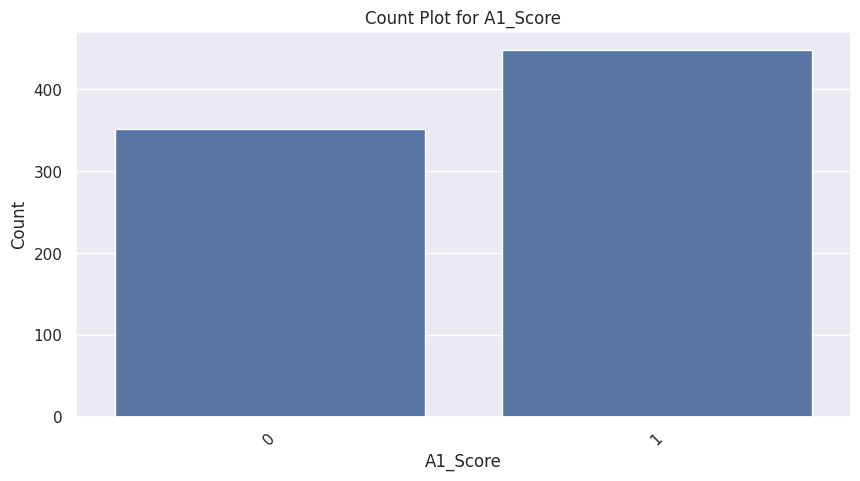

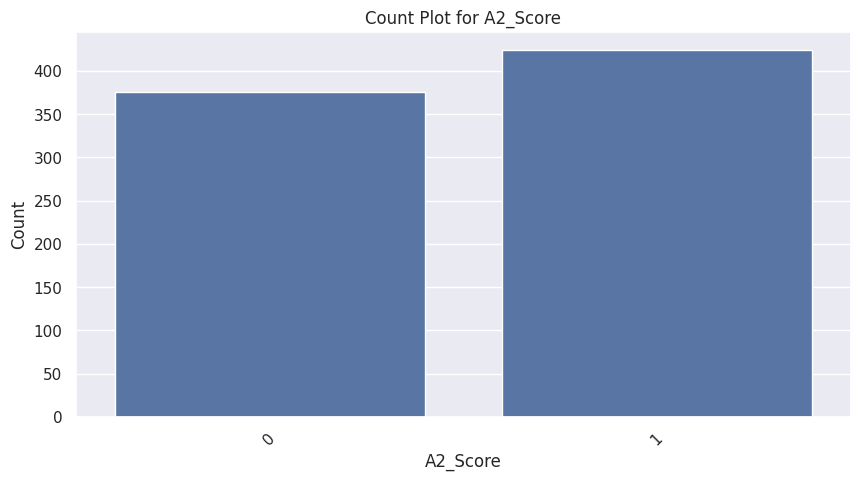

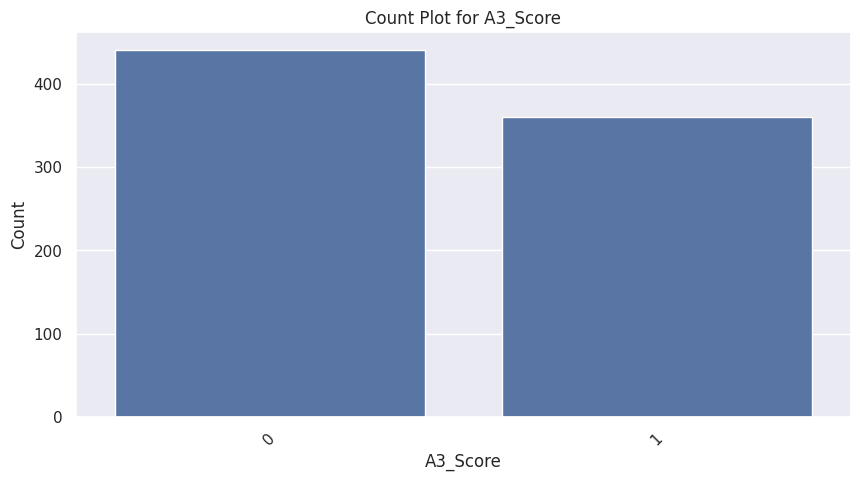

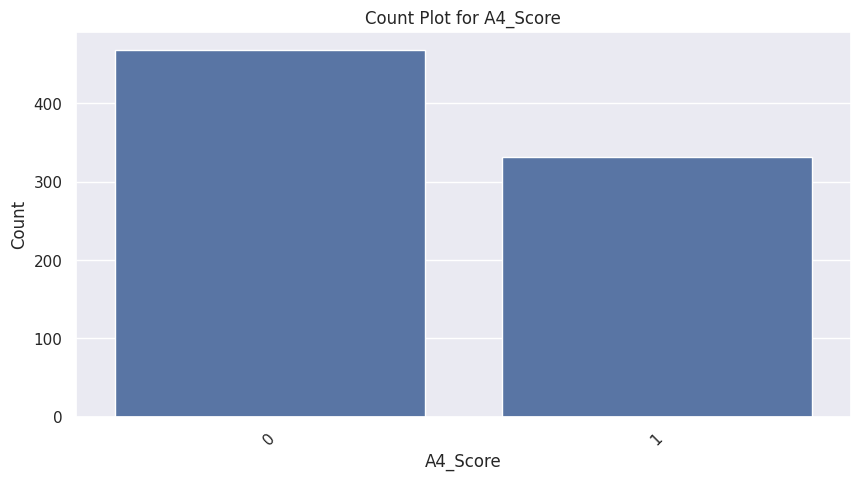

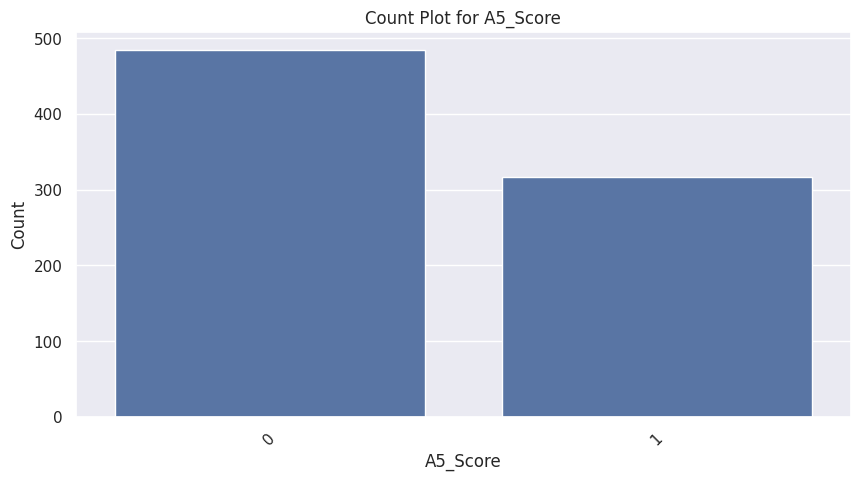

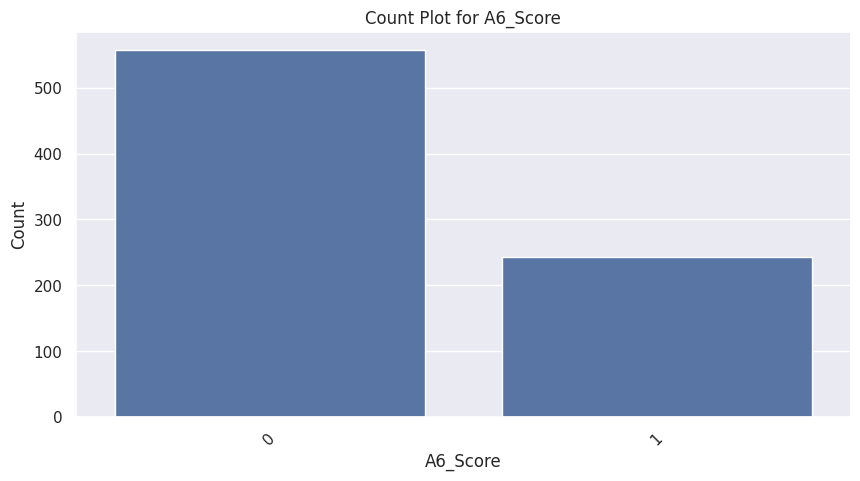

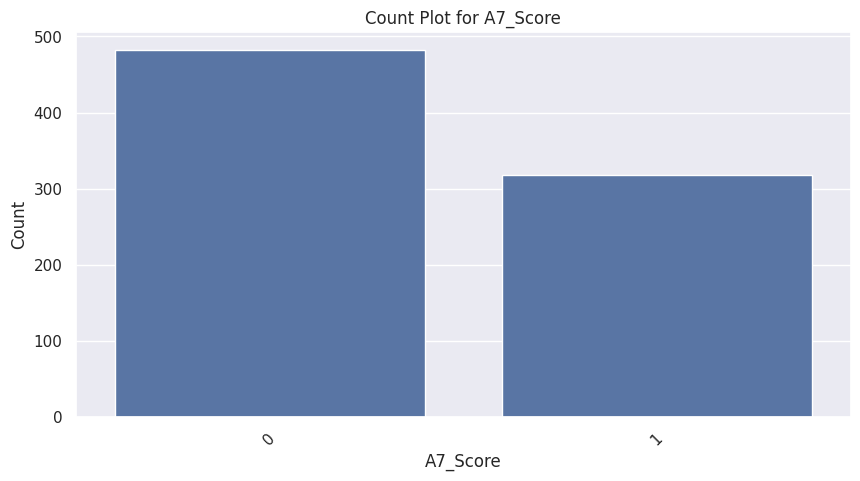

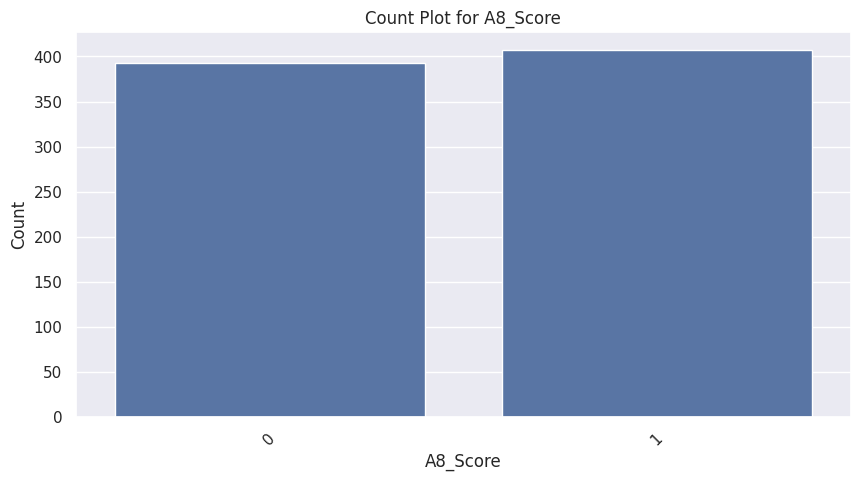

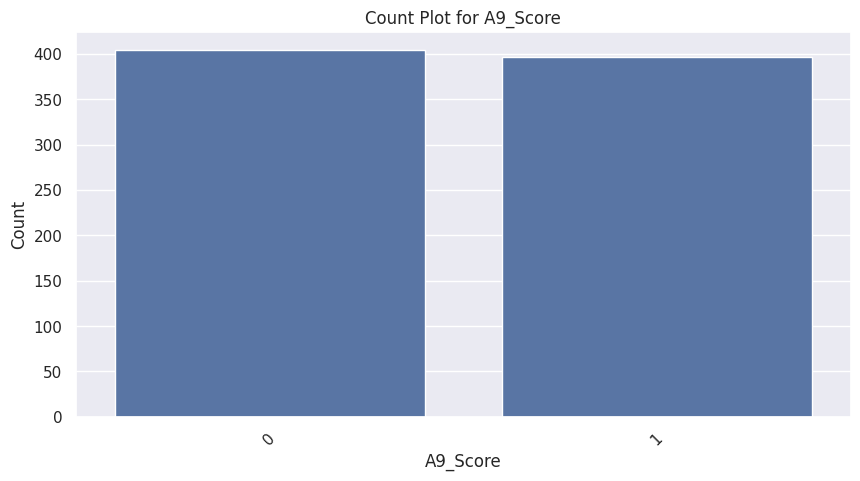

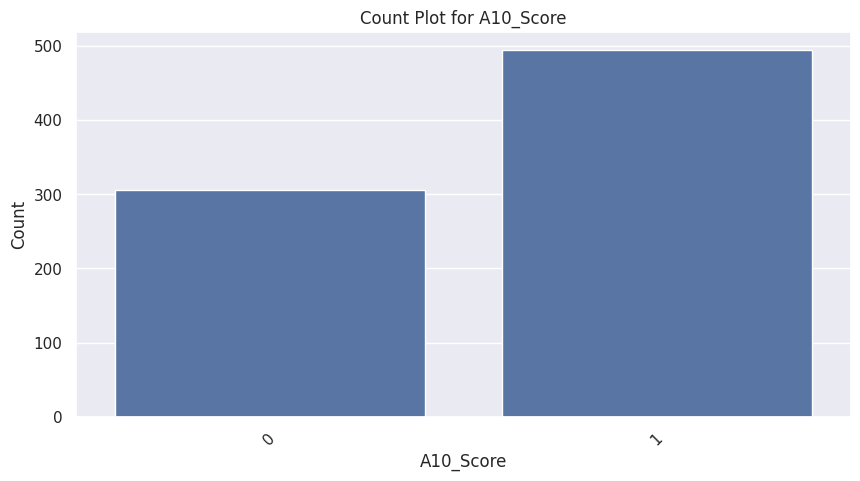

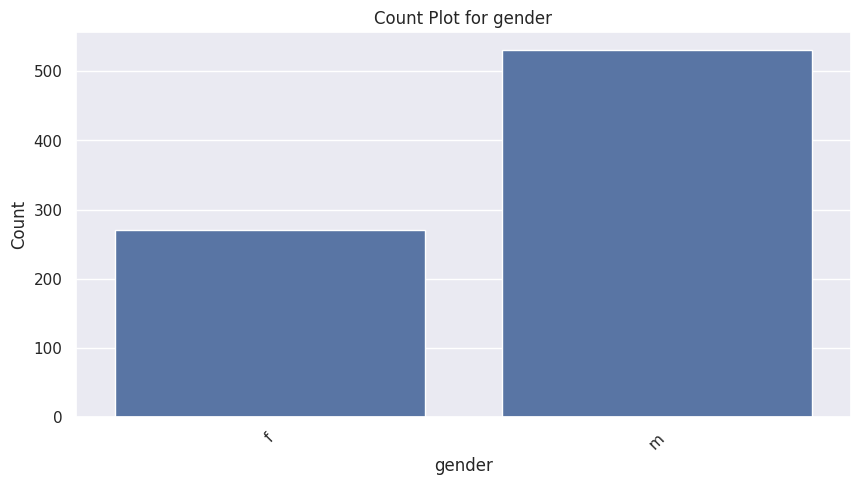

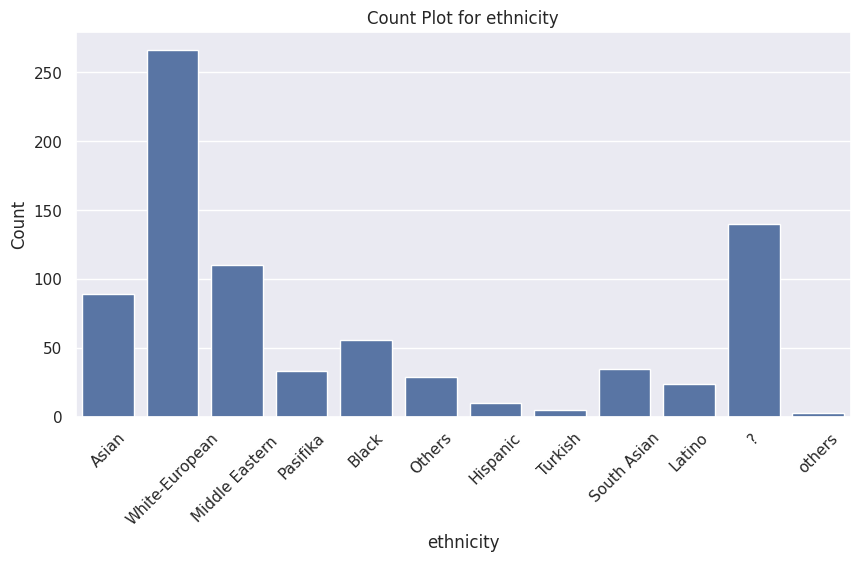

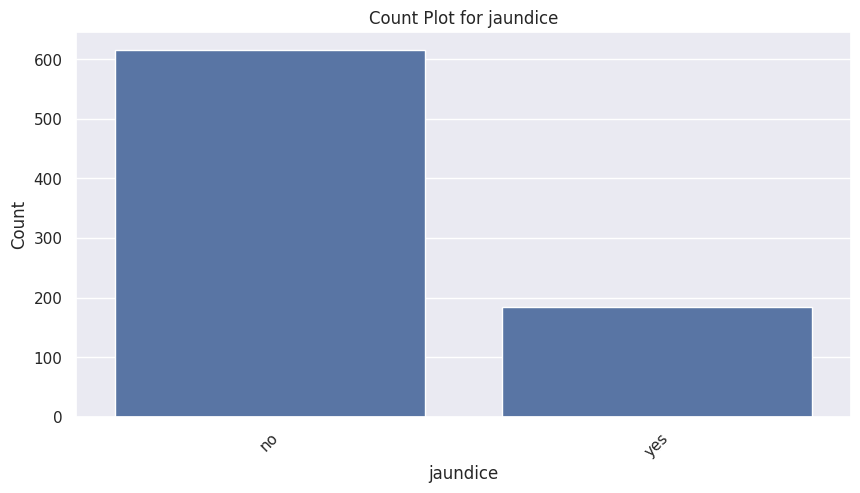

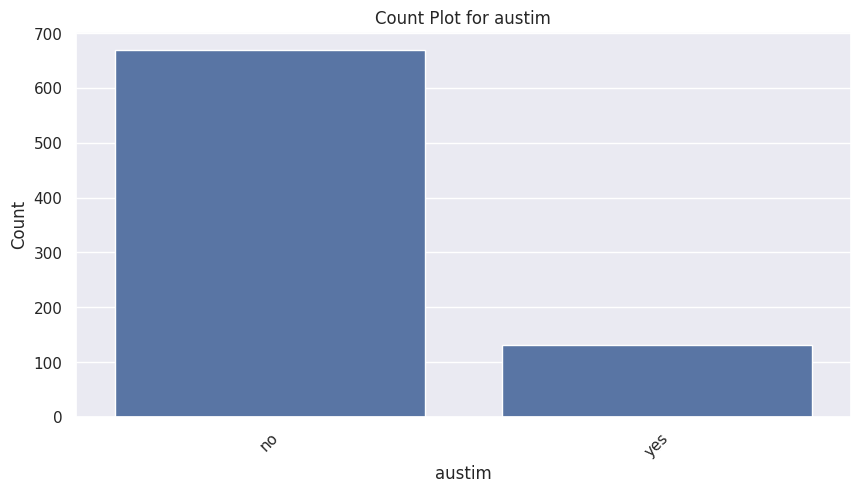

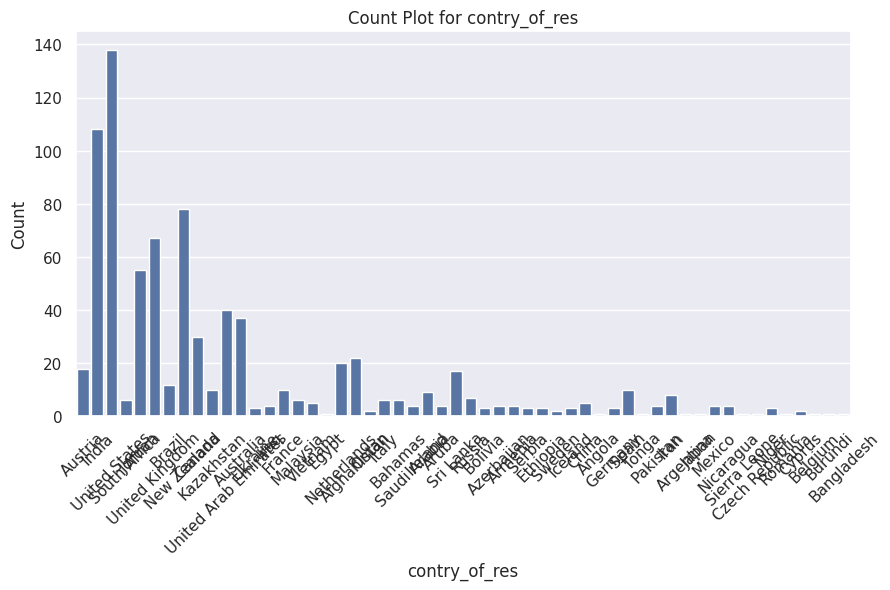

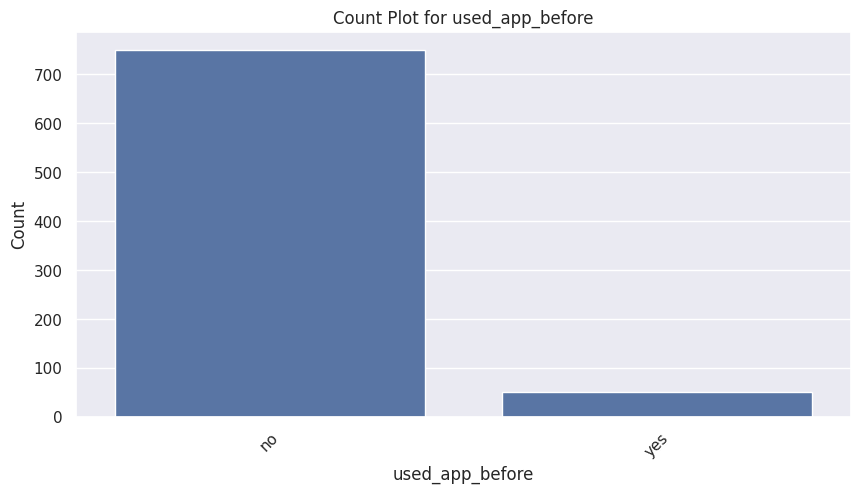

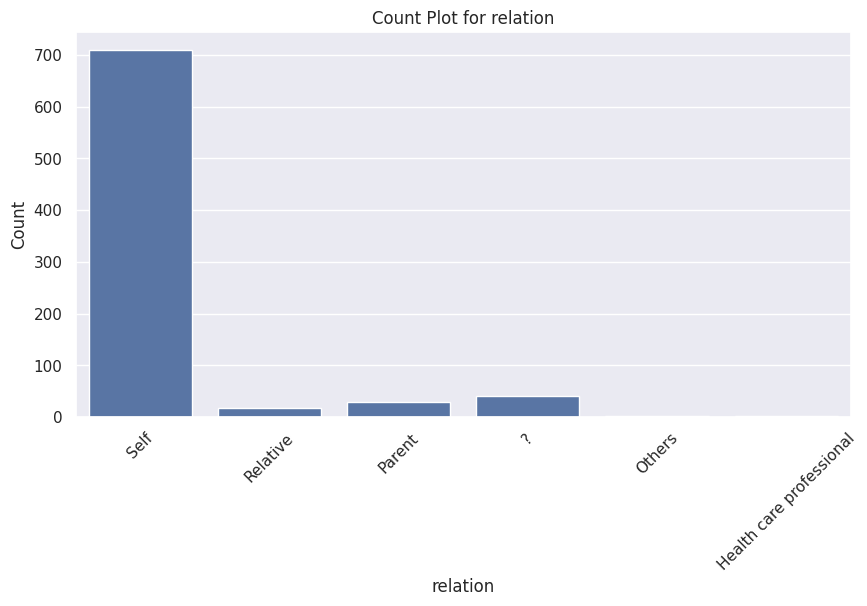

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))  # Adjust figure size if necessary
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()

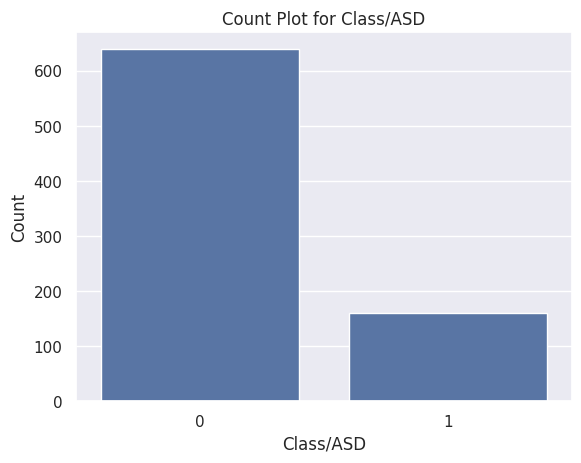

In [ ]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


handle missing values in ethnicity and relation column

In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [ ]:
df["ethnicity"].unique()

array(['Asian', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [ ]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Asian,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,White-European,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,White-European,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,White-European,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [ ]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [ ]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,0,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,9,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,9,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,9,0,0,44,0,-4.777286,1,0


Bivariate Analysis

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

**4. Data preprocessing**

Handling teh outliers

In [ ]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,0,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,9,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,9,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,9,0,0,44,0,-4.777286,1,0


In [ ]:
df.shape

(800, 20)

**Train Test Split**

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [ ]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score        age  gender  ethnicity  jaundice 

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries #original modal
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the dataset (replace with your actual dataset path)
df = pd.read_csv("/content/train.csv")

# Drop unnecessary columns (as done in the notebook)
df.drop(columns=["ID", "age_desc"], errors='ignore', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features (X) and target (y)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)                                       #initialize modal
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Fit models on original (imbalanced) data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluate accuracy before SMOTE & tuning
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

print("Decision Tree Accuracy :", dt_accuracy)
print("Random Forest Accuracy :", rf_accuracy)
print("XGBoost Accuracy :", xgb_accuracy)

# Optional: Print classification reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_model.predict(X_test)))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_model.predict(X_test)))

Decision Tree Accuracy : 0.8125
Random Forest Accuracy : 0.85
XGBoost Accuracy : 0.83125

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       124
           1       0.61      0.47      0.53        36

    accuracy                           0.81       160
   macro avg       0.73      0.69      0.71       160
weighted avg       0.80      0.81      0.80       160


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       124
           1       0.70      0.58      0.64        36

    accuracy                           0.85       160
   macro avg       0.79      0.76      0.77       160
weighted avg       0.84      0.85      0.84       160


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       124
           1       0.64      0.58      0

In [ ]:
#hyperparameter tuning

# Define parameter grids for hyperparameter tuning
dt_params = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Hyperparameter tuning function
def tune_model(classifier, param_grid, X_train, y_train):
    rs = RandomizedSearchCV(
        classifier,
        param_distributions=param_grid,
        n_iter=10,
        scoring="accuracy",
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    return rs.best_estimator_, rs.best_params_

# Perform tuning for all models
best_dt, best_dt_params = tune_model(DecisionTreeClassifier(), dt_params, X_train, y_train)
best_rf, best_rf_params = tune_model(RandomForestClassifier(), rf_params, X_train, y_train)
best_xgb, best_xgb_params = tune_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, X_train, y_train)

print("Best Decision Tree Parameters:", best_dt_params)
print("Best Random Forest Parameters:", best_rf_params)
print("Best XGBoost Parameters:", best_xgb_params)

# Evaluate tuned models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nClassification Report for {type(model).__name__}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {type(model).__name__}:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy

dt_accuracy = evaluate_model(best_dt, X_test, y_test)
rf_accuracy = evaluate_model(best_rf, X_test, y_test)
xgb_accuracy = evaluate_model(best_xgb, X_test, y_test)

print(f"\nFinal Model Accuracies:")
print(f"Decision Tree: {dt_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"XGBoost: {xgb_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:09:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'gini'}
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'bootstrap': True}
Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       124
           1       0.64      0.69      0.67        36

    accuracy                           0.84       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.85      0.84      0.85       160

Confusion Matrix for DecisionTreeClassifier:
[[110  14]
 [ 11  25]]

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       124
           1 

In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE (Synthetic Minority Oversampling technique)**

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

(1030,)


In [ ]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**5. Model Training**

In [ ]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
#SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Use StratifiedKFold to prevent data leakage
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with SMOTE inside cross-validation...")

    # Create a pipeline to apply SMOTE only inside each fold
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Perform cross-validation with the pipeline
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="accuracy")
    cv_scores[model_name] = scores

    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-" * 50)


Training Decision Tree with SMOTE inside cross-validation...
Decision Tree Cross-Validation Accuracy: 0.78
--------------------------------------------------
Training Random Forest with SMOTE inside cross-validation...
Random Forest Cross-Validation Accuracy: 0.83
--------------------------------------------------
Training XGBoost with SMOTE inside cross-validation...
XGBoost Cross-Validation Accuracy: 0.82
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.765625 , 0.796875 , 0.7578125, 0.8046875, 0.78125  ]),
 'Random Forest': array([0.84375  , 0.8671875, 0.796875 , 0.828125 , 0.828125 ]),
 'XGBoost': array([0.8046875, 0.84375  , 0.7734375, 0.8046875, 0.8515625])}

**6. Model Selection & Hyperparameter Tuning**

In [ ]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [ ]:
#hypermeterparameter with SMOTE
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [ ]:
# Apply SMOTE only to the training set before fitting final models
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [ ]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)
Best Cross-Validation Accuracy: 0.92


In [ ]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**7. Evaluation**

In [ ]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
from sklearn.metrics import classification_report

y_test_pred = best_model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Accuracy score:
 0.8
Confusion Matrix:
 [[108  16]
 [ 16  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.56      0.56      0.56        36

    accuracy                           0.80       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.80      0.80      0.80       160

Accuracy on Test Set: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.56      0.56      0.56        36

    accuracy                           0.80       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.80      0.80      0.80       160



To do:
1. Build a Predictive system with encoders and model file
2. See if you could improve teh performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load and preprocess data
df = pd.read_csv("/content/train.csv")
df.drop(columns=["ID", "age_desc"], errors='ignore', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features (X) and target (y)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (before tuning)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Fit models on original (imbalanced) data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluate accuracy before SMOTE & tuning
dt_acc_before = accuracy_score(y_test, dt_model.predict(X_test))
rf_acc_before = accuracy_score(y_test, rf_model.predict(X_test))
xgb_acc_before = accuracy_score(y_test, xgb_model.predict(X_test))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning (RandomizedSearchCV for efficiency)
# Example: Tuning Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=3, random_state=42)
rf_search.fit(X_train_smote, y_train_smote)
rf_model_tuned = rf_search.best_estimator_

# Similarly, tune Decision Tree & XGBoost (simplified for brevity)
dt_params = {'max_depth': [None, 5, 10, 20]}
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, random_state=42)
dt_search.fit(X_train_smote, y_train_smote)
dt_model_tuned = dt_search.best_estimator_

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_search = RandomizedSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_params, n_iter=10, cv=3, random_state=42)
xgb_search.fit(X_train_smote, y_train_smote)
xgb_model_tuned = xgb_search.best_estimator_

# Evaluate accuracy after SMOTE & tuning
dt_acc_after = accuracy_score(y_test, dt_model_tuned.predict(X_test))
rf_acc_after = accuracy_score(y_test, rf_model_tuned.predict(X_test))
xgb_acc_after = accuracy_score(y_test, xgb_model_tuned.predict(X_test))

# Print results
print("Before SMOTE & Tuning:")
print(f"Decision Tree: {dt_acc_before:.3f}, Random Forest: {rf_acc_before:.3f}, XGBoost: {xgb_acc_before:.3f}")

print("\nAfter SMOTE & Tuning:")
print(f"Decision Tree: {dt_acc_after:.3f}, Random Forest: {rf_acc_after:.3f}, XGBoost: {xgb_acc_after:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Before SMOTE & Tuning:
Decision Tree: 0.812, Random Forest: 0.850, XGBoost: 0.831

After SMOTE & Tuning:
Decision Tree: 0.762, Random Forest: 0.825, XGBoost: 0.819


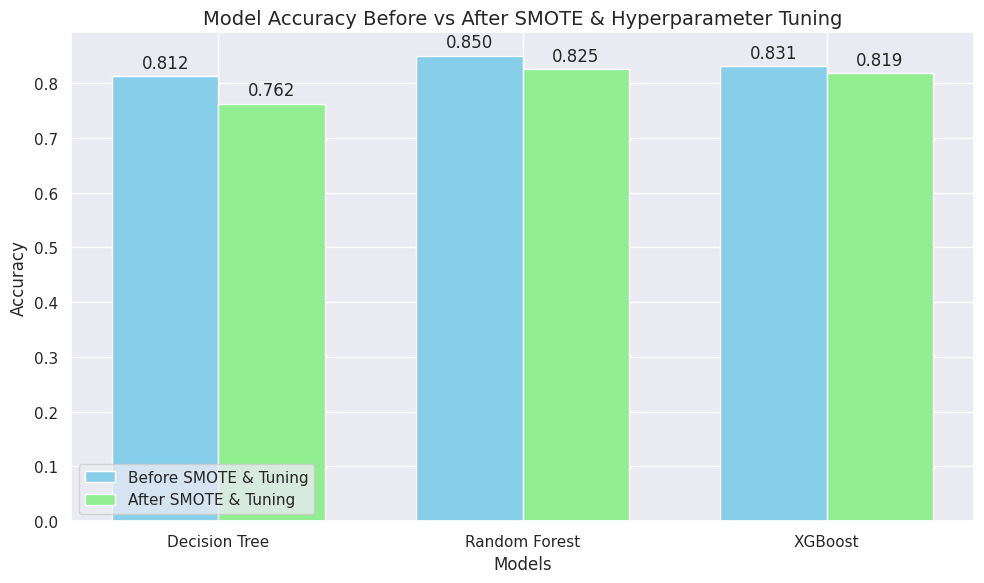

In [ ]:
# Data for plotting
models = ['Decision Tree', 'Random Forest', 'XGBoost']
before = [dt_acc_before, rf_acc_before, xgb_acc_before]
after = [dt_acc_after, rf_acc_after, xgb_acc_after]

# Plot
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, before, width, label='Before SMOTE & Tuning', color='skyblue')
rects2 = ax.bar(x + width/2, after, width, label='After SMOTE & Tuning', color='lightgreen')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Accuracy Before vs After SMOTE & Hyperparameter Tuning', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


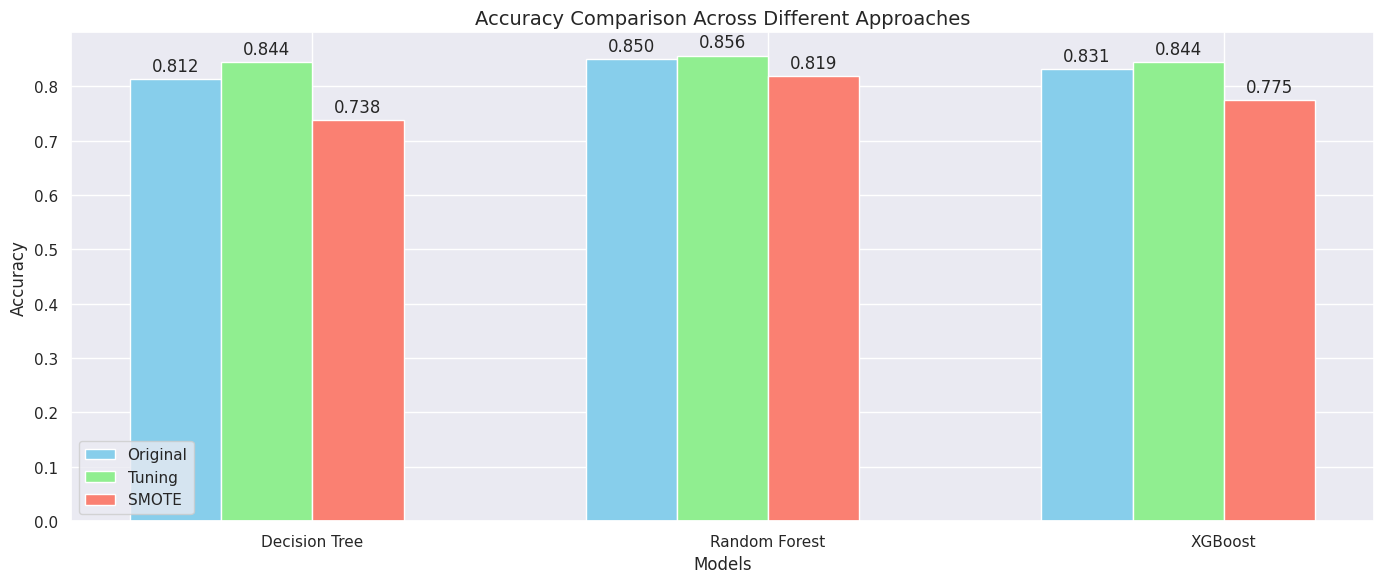

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load and preprocess data
df = pd.read_csv("/content/train.csv")
df.drop(columns=["ID", "age_desc"], errors='ignore', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features (X) and target (y)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Store results
results = {
    "Original": [],
    "Tuning": [],
    "SMOTE": [],

}

# 1. Original (no SMOTE, no tuning)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["Original"].append(accuracy_score(y_test, y_pred))

# 2. Tuning Only (no SMOTE)
param_grids = {
    "Decision Tree": {'max_depth': [None, 5, 10, 20]},
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

for name, model in models.items():
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=10,
        cv=3,
        random_state=42
    )
    search.fit(X_train, y_train)  # Note: Using original imbalanced data
    y_pred = search.best_estimator_.predict(X_test)
    results["Tuning"].append(accuracy_score(y_test, y_pred))

# 3. SMOTE Only (no tuning)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    results["SMOTE"].append(accuracy_score(y_test, y_pred))


# Plotting
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - 1.5*width, results["Original"], width, label='Original', color='skyblue')
rects2 = ax.bar(x - 0.5*width, results["Tuning"], width, label='Tuning', color='lightgreen')
rects3 = ax.bar(x + 0.5*width, results["SMOTE"], width, label='SMOTE', color='salmon')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison Across Different Approaches', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


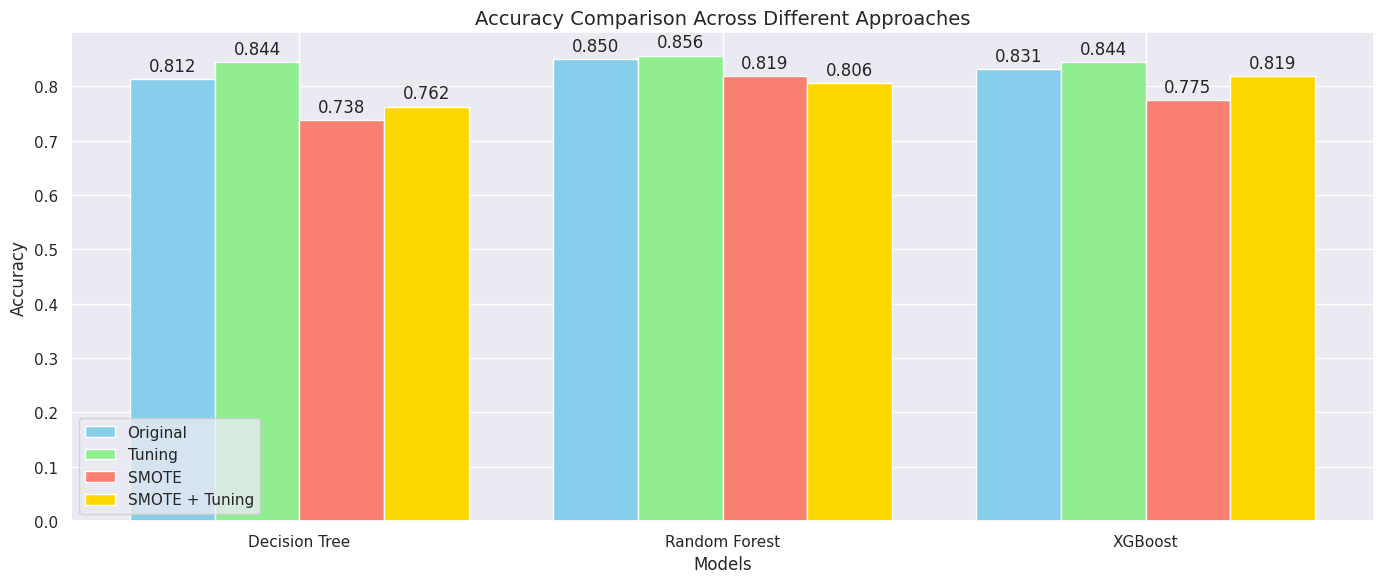

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load and preprocess data
df = pd.read_csv("/content/train.csv")
df.drop(columns=["ID", "age_desc"], errors='ignore', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features (X) and target (y)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Store results
results = {
    "Original": [],
    "Tuning ": [],
    "SMOTE ": [],
    "SMOTE + Tuning": []
}

# 1. Original (no SMOTE, no tuning)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["Original"].append(accuracy_score(y_test, y_pred))

# 2. Tuning Only (no SMOTE)
param_grids = {
    "Decision Tree": {'max_depth': [None, 5, 10, 20]},
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

for name, model in models.items():
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=10,
        cv=3,
        random_state=42
    )
    search.fit(X_train, y_train)  # Note: Using original imbalanced data
    y_pred = search.best_estimator_.predict(X_test)
    results["Tuning "].append(accuracy_score(y_test, y_pred))

# 3. SMOTE Only (no tuning)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    results["SMOTE "].append(accuracy_score(y_test, y_pred))

# 4. SMOTE + Tuning
for name, model in models.items():
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=10,
        cv=3,
        random_state=42
    )
    search.fit(X_train_smote, y_train_smote)  # Using SMOTE data
    y_pred = search.best_estimator_.predict(X_test)
    results["SMOTE + Tuning"].append(accuracy_score(y_test, y_pred))

# Plotting
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - 1.5*width, results["Original"], width, label='Original', color='skyblue')
rects2 = ax.bar(x - 0.5*width, results["Tuning "], width, label='Tuning', color='lightgreen')
rects3 = ax.bar(x + 0.5*width, results["SMOTE "], width, label='SMOTE ', color='salmon')
rects4 = ax.bar(x + 1.5*width, results["SMOTE + Tuning"], width, label='SMOTE + Tuning', color='gold')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison Across Different Approaches', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()